# Assignment 4. Exercise 3.2. Comparison of Clustering Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, k_means
from sklearn.metrics.pairwise import euclidean_distances
from bkmeans import *

In [2]:
data1 = pd.read_csv('breast_cancer.csv',names=range(10))
data2 = pd.read_csv('en_tweet.csv',index_col='tweet_id' )
data3 = pd.read_csv('sw_tweet.csv',index_col='tweet_id')

In [3]:
X1 = data1.iloc[:500,:]
X2 = data2.iloc[:500,:]
X3 = data3.iloc[:500,:]

In [4]:
pca = PCA(n_components=2)


pca_x1 = pca.fit_transform(X1)
pca_x1 = pd.DataFrame(pca_x1)

pca_x2 = pca.fit_transform(X2)
pca_x2 = pd.DataFrame(pca_x2)

pca_x3 = pca.fit_transform(X3)
pca_x3 = pd.DataFrame(pca_x3)


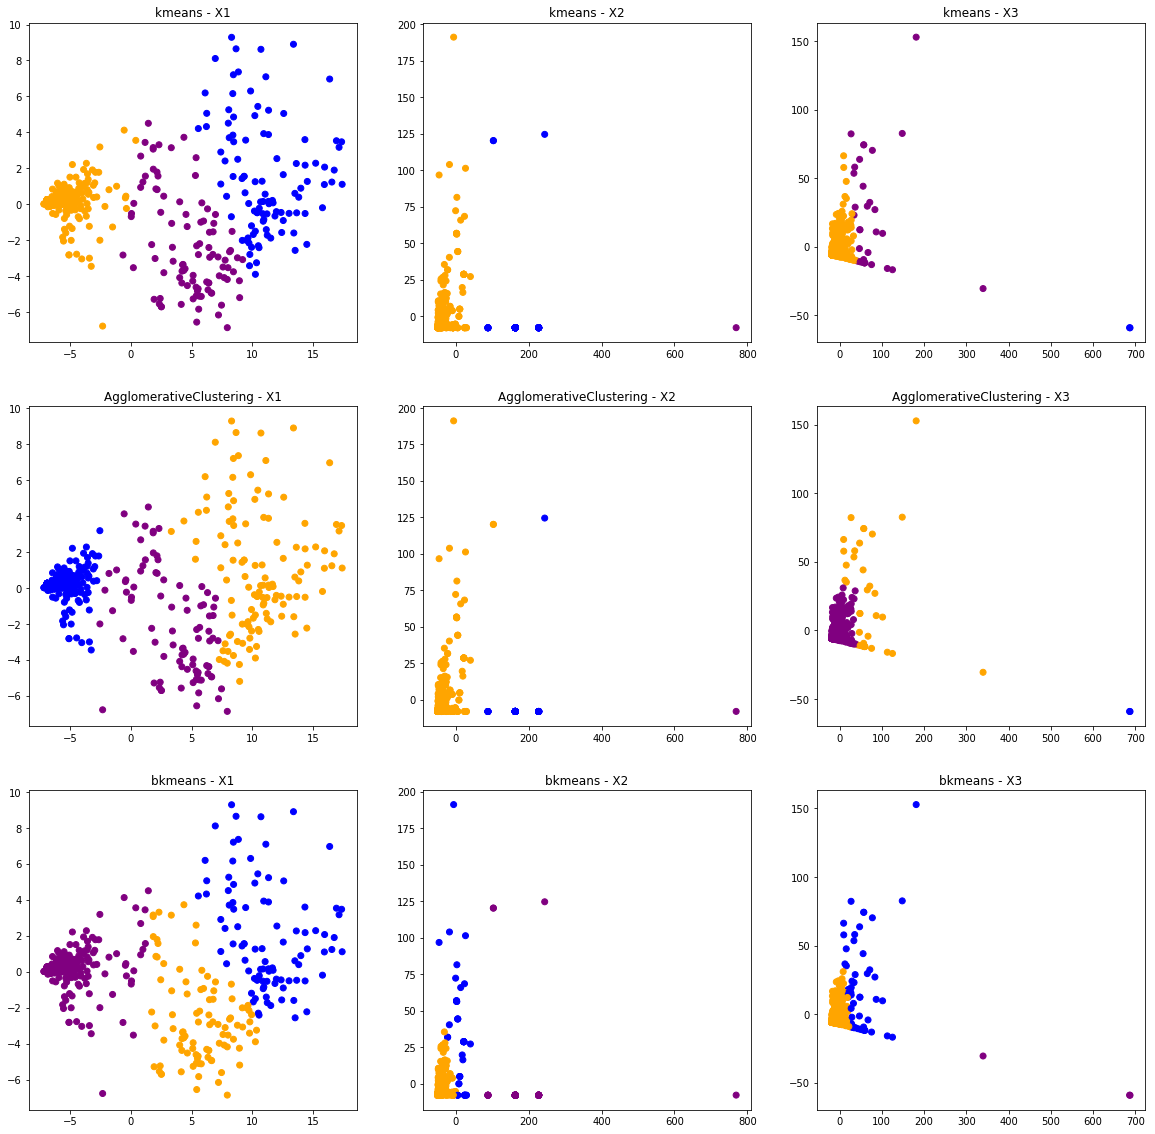

In [5]:
plt.figure(figsize=(20 ,20))

colors = ['orange','blue','purple','green','#2fd0a4']

#++++++++++++++++++++++++++++++++++++++++++++ kmeans
for i,d in enumerate([pca_x1,pca_x2,pca_x3]):
    plt.subplot(3,3, i+1)
    clusterer = KMeans(n_clusters=3,random_state=42).fit(d)
    #centers = clusterer.cluster_centers_
    c_preds = clusterer.predict(d)
    colored = [colors[k] for k in c_preds]
    plt.scatter(d.iloc[:,0],d.iloc[:,1],  color = colored)
    plt.title('kmeans - X{}'.format(i+1))

  
 #++++++++++++++++++++++++++++++++++++++++++++ AgglomerativeClustering

for i,d in enumerate([pca_x1,pca_x2,pca_x3]):
    plt.subplot(3,3, i+4)
    clusterer = AgglomerativeClustering(n_clusters=3).fit(d)
    #centers = clusterer.cluster_centers_
    c_preds = clusterer.labels_
    colored = [colors[k] for k in c_preds]
    plt.scatter(d.iloc[:,0],d.iloc[:,1],  color = colored)
    plt.title('AgglomerativeClustering - X{}'.format(i+1))
   
 #++++++++++++++++++++++++++++++++++++++++++++ bkmeans

for i,d in enumerate([pca_x1,pca_x2,pca_x3]):
    plt.subplot(3,3, i+7)

    c_preds = list(bkmeans(d,10,3))
    colored = [colors[k] for k in c_preds]
    plt.scatter(d.iloc[:,0],d.iloc[:,1],  color = colored)
    plt.title('bkmeans - X{}'.format(i+1))
  
   
plt.show()

As it is shown in breat cancer dataset(X1) it seems all three clustering Techniques performed fair enough and relatively similar to gether.

English tweets seems that bkmeans is best for it, in compare with the other two techniques kmeans and Agglomerative Clustering.

Swedish dataset performed more or the less the same for all three different Clustering techniques.

One interested point which I realized, was when I replace 1000 Tweet data by 10K tweet data, Agglomerative  clustering can’t handle that big data well but K Means clustering can do.

Another thing was in K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times differs, While results are reproducible in Hierarchical clustering.

It seems that Hierarchical clustering produces more intuitive results.

It seems not easy to see which clustering technique performed the best. Or It might be my bad in choosing not good dataset.